# Projeto Determinação de Tamanho de Grãos

Esse projeto consiste na utilização de técnicas de Processamento de Imagens para realizar a determinação de tamanho de grão para imagens de micrografia de metais (figura 1). Essa tarefa é atualmente realizada manualmente por estudantes de Engenharia de Materiais. 
O objetivo final é a criação de um site ou aplicativo para computador ou smartphone que realize essa tarefa automaticamente. 
No início serão feitas reuniões semanais presenciais para aprendizado das técnicas, até que todos tenham certo domínio e possam entender e executar as tarefas para resolver o problema. No estágio final, será feita a exportação para um aplicativo.

Softwares/bibliotecas/ferramentas:
 * Linux ou Windows
 * Python3 - excelente suporte para processamento de imagens
 * Anaconda - ambientes virtuais para instalação de bibliotecas do python
 * Numpy - suporte para funções matemáticas e matrizes
 * Matplotlib - necessária para a visualização
 * OpenCV - principal biblioteca de imagens e visão computacional

## Aula01 - Anaconda e Python

Roteiro:
 * 1. Anaconda
 * 2. Python
 * 3. Amostragem e Quantização

### 1. Anaconda
#### Instalação
 * Principal: https://www.anaconda.com/distribution/
 * Windows: https://docs.anaconda.com/anaconda/install/windows/
 * Linux: https://docs.anaconda.com/anaconda/install/linux/
 * Caso haja problemas, utilizar uma versão mais antiga: https://repo.continuum.io/archive/


#### Abrindo Anaconda
Digite "anaconda" na barra do windows

Anaconda Navigator - interface gráfica

Anaconda Prompt - terminal

#### Anaconda Navigator
Para criar um ambiente:
 * Enviroments > create > Name: contagem; Python: 3.7
Ativar um ambiente:
 * Enviroments > contagem > clicar no ambiente de escolha
Instalar Jupyter:
 * Com o ambiente contagem ativado
 * Home > notebook > install
Instalar bibliotecas:
 * Enviroments > search packages > apply
 * Bibliotecas a serem instaladas
    * conda install opencv=3.4.2
    * conda install jupyter
    * conda install matplotlib
    * conda install pillow
 


#### Anaconda Prompt

In [ ]:
#Comandos do Anaconda Prompt
#Conferir versões
python -V       #eu utilizo python 3.7
conda --version #eu utilizo o conda 4.7

#Fazendo update do Anaconda
conda update conda #pode demorar

#Criar ambiente
conda create --name nomeAmbiente python=3.7

#Listar ambientes
conda env list

#Ativar ambiente
conda activate nomeAmbiente

#Instalar bibliotecas no ambiente
conda install nomeBiblioteca=versão
conda remove  nomeBiblioteca
pip install   nomeBiblioteca==versão #no linux há diferença entre pip e pip3, use o último
pip uninstall nomeBiblioteca

    #Bibliotecas a serem instaladas
    conda install opencv=3.4.2
    conda install jupyter
    conda install matplotlib
    conda install pillow

#Listar bibliotecas no ambiente
conda list

#Ativar o jupyter notebooks
jupyter notebook

#RODAR ARQUIVO PYTHON
python nomeDoPrograma.py

#Desativar o ambiente
conda deactivate nomeAmbiente

In [ ]:
#Comandos do windows
#Entrar em pastas
cd nomePasta/nomeSubpasta
cd .. #retorna à última pasta

#Listar arquivos
dir
tree

#Parar a execução de qualquer comando no windows
"ctrl+c"

#Copiar para área de transferência
"ctrl+shift+c"

### 2. Python
#### Bibliotecas

In [1]:
#É possível instalar bibliotecas diretamente pelo notebook
if False:
    !pip install -U numpy
    !pip install matplotlib==3.1.1
    !pip install opencv-python==3.4.3

In [2]:
#Importando bibliotecas instaladas   
import numpy as np              #1.17.4 no colabs
import cv2                      #3.4.3 no Colabs
import matplotlib.pyplot as plt #3.1.1 no Colabs
    #Importo as funções contidadas na pasta "pyplot" da biblioteca "matplotlib" com a abreviação de "plt"
    #Assim, ao chamar as funções, precisarei digitar apenas"plt.função(argumento1,argumento2)"

#### Manipulando imagens

In [10]:
#Abrindo Imagem
img_original = plt.imread('data/aço 1010 50x - corrigido (1).jpg')
print(img_original.shape) #dimensões
    #(1342, 1600, 3)
    #(linhas, colunas, canais)
print(img_original.dtype)

print(img_original[:10,:10,0])
    #seleciono intervalo de pixeis [1,10], e apenas 1 canal de cor

(1342, 1600, 3)
uint8
[[214 211 210 202 198 188 184 178 179 172]
 [212 210 208 202 197 188 182 178 174 169]
 [204 204 200 198 188 184 177 175 171 167]
 [193 193 188 188 180 177 170 169 171 166]
 [182 183 179 180 172 172 166 167 166 164]
 [172 172 170 170 167 166 164 164 161 160]
 [159 159 160 160 162 159 160 160 156 161]
 [152 151 156 153 155 153 156 156 158 163]
 [150 151 150 149 148 151 153 158 160 168]
 [157 157 158 159 161 164 167 171 179 184]]


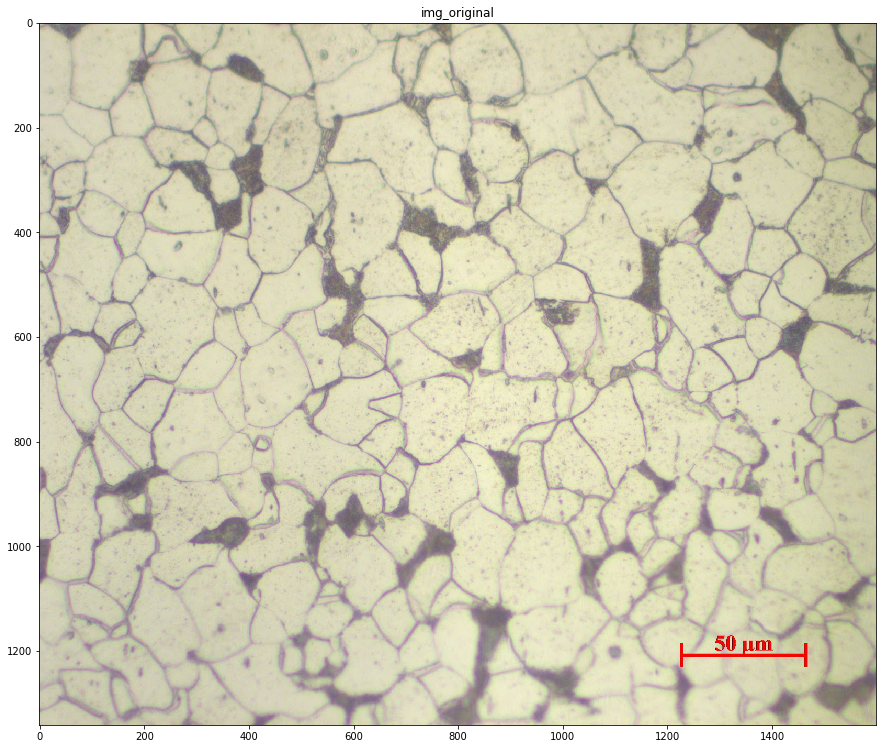

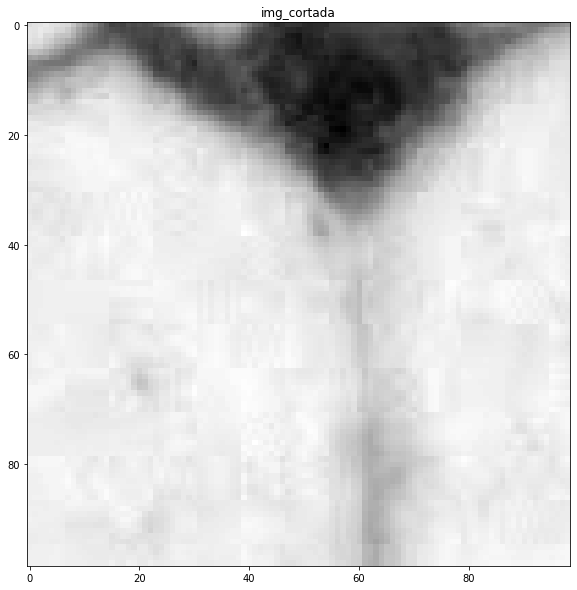

In [11]:
#Mostrando imagem
plt.figure(figsize=(15,15)) #tamanho do output(largura,altura)
plt.title("img_original") #título
fig = plt.imshow(img_original, "plasma") #imagem e ucmap

#Zoom
plt.figure(figsize=(10,10))
plt.title("img_cortada") #título
fig = plt.imshow(img_original[1:100,1:100,1], "gray") #imagem e ucmap

In [4]:
#Conferindo Dimensões
print("Resolução:", img_original.dtype,"= cada pixel contém um valor de inteiro positivo, de 8 bits(256 intensidades)")
print("Dimensões: altura",img_original.shape[0],"; largura",img_original.shape[1],"; canais", img_original.shape[2])
print("Intensidade de cor mínima:",np.min(img_original[:,:,1]))
print("Intensidade de cor máxima:",np.max(img_original[:,:,1]))
    
#Extraindo dados
y,x = img_original.shape[:2]
c = 3 #Canais
q = 8 #bits de quantização

Resolução: uint8 = cada pixel contém um valor de inteiro positivo, de 8 bits(256 intensidades)
Dimensões: altura 1342 ; largura 1600 ; canais 3
Intensidade de cor mínima: 0
Intensidade de cor máxima: 252
